# Matplotlib Demo

---

Author: Riley X. Brady
Date: February 6th, 2019
Contact: riley.brady@colorado.edu

---

`matplotlib` is a powerful package for making static publication-quality graphics.

## References

1. [matplotlib example gallery](https://matplotlib.org/gallery/index.html)
2. [matplotlib style sheets reference](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
3. [markers](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
4. [line styles](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

## Other Tutorials

1. [Effectively Using Matplotlib](http://pbpython.com/effective-matplotlib.html?utm_campaign=Data_Elixir&utm_medium=email&utm_source=Data_Elixir_129)

In [3]:
import numpy as np

# matplotlib imports
import matplotlib.pyplot as plt
# needed for Jupyter notebooks.
%matplotlib inline 

## Setting up your plot

---

The matplotlib [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) object incorporates the whole window in the user interface. You can just have one plot (e.g., a line plot) in your figure object, or you could have multiple *subplots*. However, to me, the base figure object is unnecessary. In the below example, you have to create a figure object, then a subplot object.

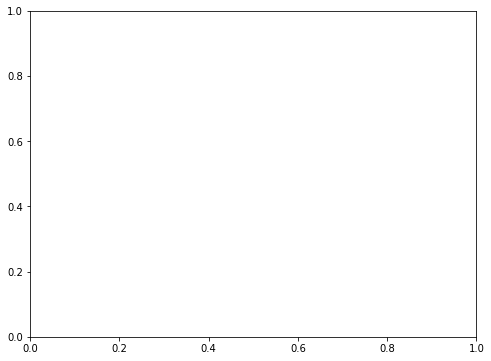

In [23]:
f = plt.figure(figsize=(8,6))
plt.subplot()

I prefer the [subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) command which returns both figure and axes objects, making things a bit easier. My advice: always start your figures with `plt.subplots()`.

There are plenty of powerful alternatives to aid in making complex subplot arrays, such as [gridspec](https://matplotlib.org/users/gridspec.html).

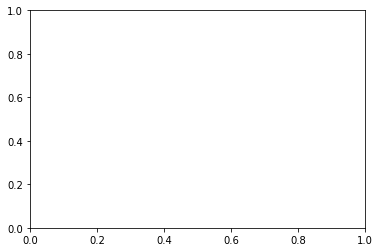

In [24]:
# A single plot. 'fig' controls figure properties; 'ax' control axis properties.
fig, ax = plt.subplots()

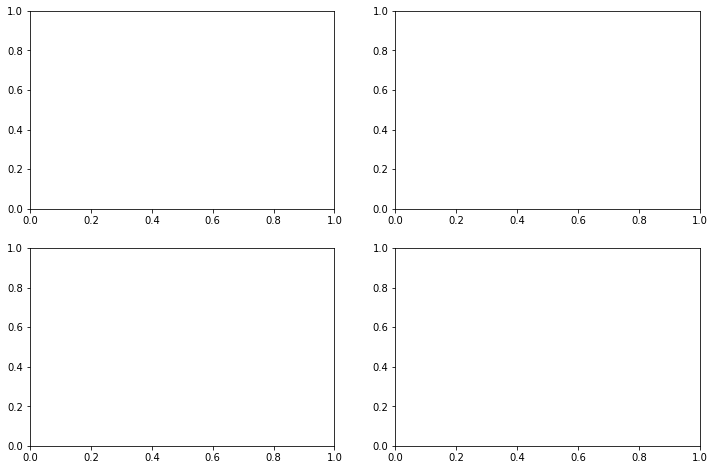

In [28]:
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)

## Line Plots

---

The `plot` method plots a simple line plot. It expects at the least a list or array of time series values:

```python
x = np.linspace(-np.pi, np.pi, 64, endpoint=True)
y = np.cos(x)
plt.plot(y)
```

You can also add on an x-axis:

```python
x = np.linspace(-np.pi, np.pi, 64, endpoint=True)
y = np.cos(x)
plt.plot(x, y)
```

Note that `scatter` is quite similar and produces a scatter plot. It won't be covered here, but you can find the documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter).

In [53]:
# generate data
X = np.linspace(-np.pi, np.pi, 64, endpoint=True)
C, S = np.cos(X), np.sin(X)

### Default Line Plot

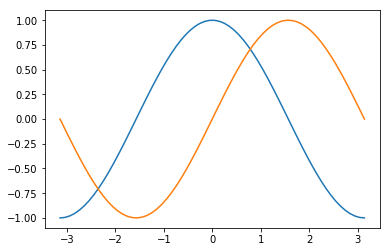

In [54]:
fig, ax = plt.subplots()
# It's a good habit to tell matplotlib exactly which axis you're plotting on
ax.plot(X, C)
ax.plot(X, S)

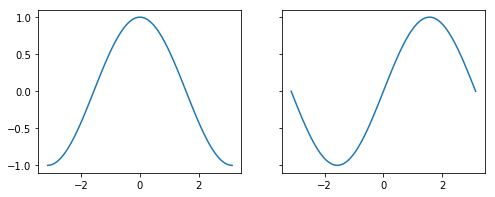

In [55]:
fig, ax = plt.subplots(figsize=(8,3), ncols=2, sharex=True,
                       sharey=True)
# subplots are indexed. if you have both columns and rows,
# you would index like ax[0,0,], ax[0,1] and so on.
ax[0].plot(X, C)
ax[1].plot(X, S)

### Now with a legend!

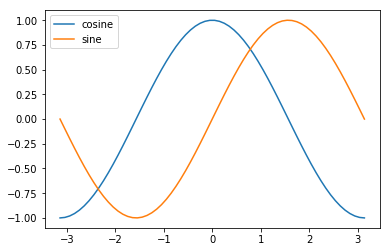

In [56]:
fig, ax = plt.subplots()
ax.plot(X, C, label='cosine')
ax.plot(X, S, label='sine')
ax.legend()

### Line plot aesthetics

---

These principles apply to most plot types for `matplotlib`. You will get an intuition as to when you can use certain keywords.

#### Keywords:

**color**: (string) color of the line

**linewidth**: (integer) width of line

**linestyle**: (string) style of line to be plotted

**marker**: (string) type of marker to plot over line ([reference](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers))

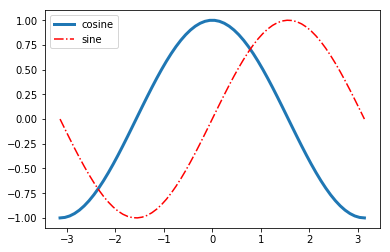

In [66]:
fig, ax = plt.subplots()
ax.plot(X, C, label='cosine', linewidth=3)
ax.plot(X, S, label='sine', linestyle='-.', color='red')
ax.legend()

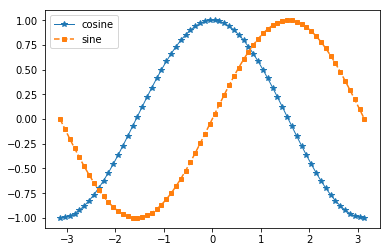

In [65]:
fig, ax = plt.subplots()
ax.plot(X, C, label='cosine', linewidth=1, marker='*')
ax.plot(X, S, label='sine', linestyle='--', marker='s', markersize=4)
ax.legend()

## Axes and Labeling

---

We've looked so far at the actual content of our plots. After making a figure/subplot, we have filled it with line plots and played around with their aesthetics. But how do we alter the axes around them?

We can pass commands to our `ax` object that came out of `plt.subplots`. These generally take the format of `ax.set_PROP()` where `PROP()` is some property.

**Properties**:

* xlim, ylim : the range of the x and y axes. Expects brackets with comma-separated values.
* title : the title of the subplot. Expects a string.
* xlabel, ylabel : labels for the x and y axes. Expects a string.
* xticks, yticks : which ticks to show. Expects a list of values.
* xticklabels, yticklabels: what to label the ticks with. Expects a list of strings of the same length as xticks/yticks.

And [many many more](https://matplotlib.org/api/axes_api.html). 

In [85]:
# Generate some time series with a linear trend and some noise.
x = np.arange(0, 100)
y = np.linspace(0, 2, 100) + np.random.rand(100,)

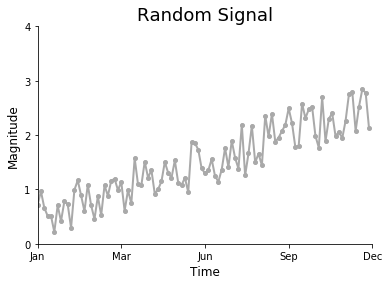

In [116]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2, color='#a9a9a9', marker='o', markersize=4)

# axes changes. Lots of MATLAB conventions here, if you're comfortable
# with that.
ax.set_xlim([0, 100])
ax.set_ylim([0, 4])
ax.set_title('Random Signal', fontsize=18)
ax.set_ylabel('Magnitude', fontsize=12)
ax.set_xlabel('Time', fontsize=12)

# ticks
ax.set_xticks([0,25,50,75,100])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Jan', 'Mar', 'Jun', 'Sep', 'Dec'])

# spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

## Style Sheets

---

It's definitely tedious to change plot styles every single time you make a plot (it takes a lot of lines of code!). There is a nice work around with "style sheets." There's a bunch of out-of-the-box ones that make your plots look great. If you're really into it, you can make your own: https://matplotlib.org/users/style_sheets.html

In [177]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

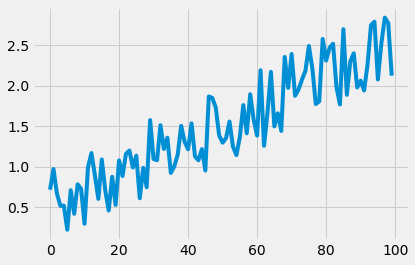

In [180]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(x, y)

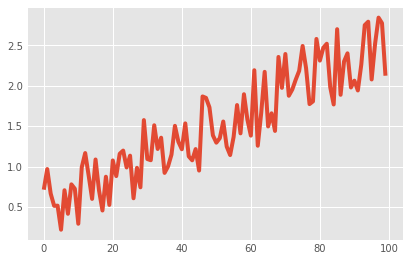

In [181]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y)

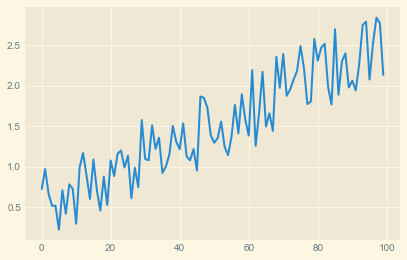

In [184]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(x, y)

In [185]:
plt.style.use('default')

## Meshes

---

In climate research, we work a lot with grids of data. Something like sea surface temperature (SST) could have dimensions (time, latitude, longitude). Other variables have depth components. We can visualize these with `pcolor`, `pcolormesh`, `contour`, and `contourf`. I'll cover the `pcolormesh` object here.

My example dataset here is sea surface temperatures from 1970-1980 in the Community Earth System Model (CESM) for a single simulation.

In [210]:
import xarray as xr

Dimensions here are 372 (months) by 384 (latitude) by 320 (longitude)

In [223]:
data = xr.open_dataset('CESM.003.SST.1970-1980.nc')
lat = np.array(data.lat)
lon = np.array(data.lon)
data = np.array(data.SST)

In [227]:
# the dimensions are 132 months x 180 latitude x 360 longitude
data.shape
# take mean over all 10 years.
meandata = np.mean(data, axis=0)
# anomalies from climatology
anom = data - meandata

### Basic pcolor map

---

It's almost always best to use `ax.pcolormesh` as it is a much faster version of `ax.pcolor`. If you are just plotting a region of the globe, you can use `ax.pcolor`. 

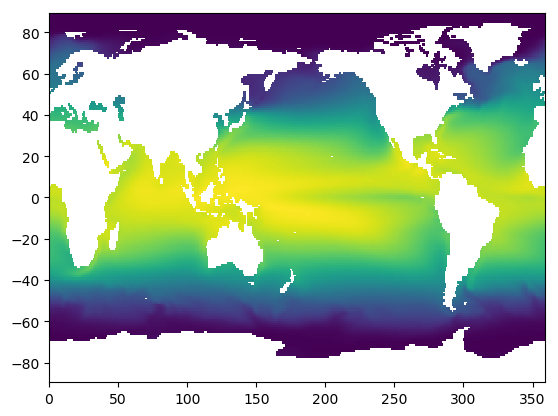

In [230]:
fig, ax = plt.subplots()
ax.pcolormesh(lon, lat, meandata)

### Add a colorbar

Text(0.5, 0, 'Longitude')

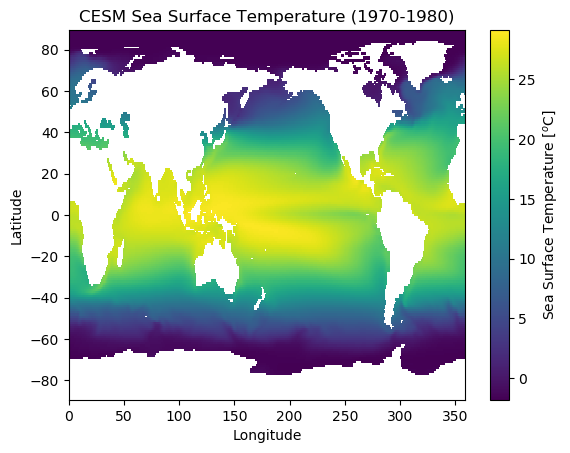

In [231]:
fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, meandata)
cb = plt.colorbar(p)

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature (1970-1980)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

### Play with colormaps :)

Just insert a string from below! You can do `CMAP_r` to reverse the colors, like `RdBu_r`

The full colormap reference is here: https://matplotlib.org/examples/color/colormaps_reference.html

![](https://i.imgur.com/pcw5QyA.png)
![](https://i.imgur.com/S3rSvag.png)
![](https://i.imgur.com/fX9oF78.png)
![](https://i.imgur.com/r2ssLP7.png)

Text(0.5, 0, 'Longitude')

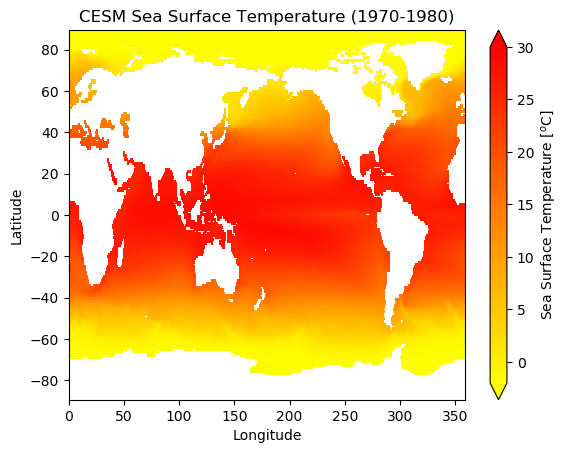

In [233]:
fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, meandata, cmap="autumn_r",
                  vmin=-2, vmax=30)
cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature (1970-1980)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

Text(0.5, 0, 'Longitude')

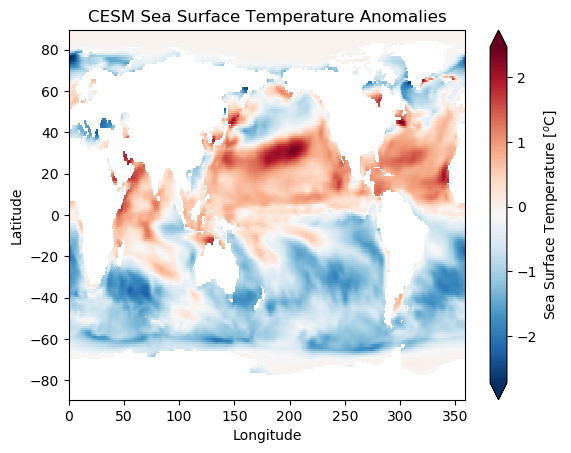

In [236]:
fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, anom[10], cmap="RdBu_r")
cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature Anomalies')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

## Geography

The plots above are a decent first glance at the data, but aren't good in terms of cartography. Luckily we have a package for that!

This serves just as a very simple high-level demo of what cartopy can do to improve upon matplotlib. See their [website](https://scitools.org.uk/cartopy/docs/latest/) for tons of demos and information.

In [242]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

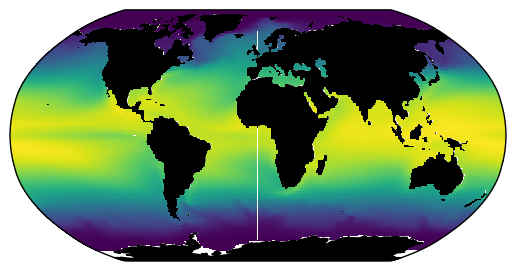

In [241]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))
ax.add_feature(cfeature.LAND, color='k')
ax.pcolormesh(lon, lat, meandata, transform=ccrs.PlateCarree())

Note that the "seam" issue is common. Cartopy has a workaround to make sure you don't have a visible seem where your data wraps around.

In [244]:
cyclic_data, cyclic_lons = add_cyclic_point(meandata, coord=lon)

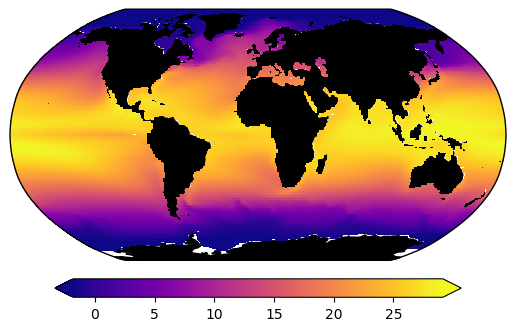

In [251]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))
ax.add_feature(cfeature.LAND, color='k')
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

All sorts of projections!

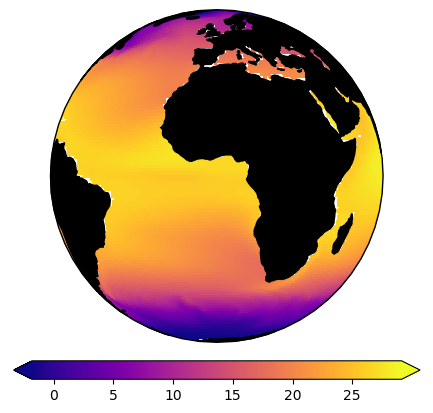

In [268]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Geostationary()))
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
# sometimes you need to invoke zorder to layer things on top of each other
ax.add_feature(cfeature.LAND, color='k', zorder=4)
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

Gridlines! (https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html)

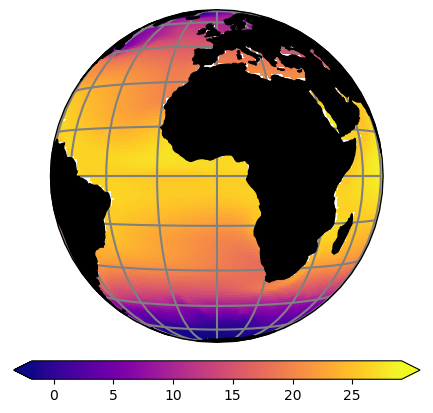

In [275]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Geostationary()))
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
# sometimes you need to invoke zorder to layer things on top of each other
ax.add_feature(cfeature.LAND, color='k', zorder=4)
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

# grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1.5, color='gray', linestyle='-')

Note that currently, grid line labeling only works for Mercator and Plate Carree. `basemap` is a useful alternative package to get grid line labeling, but they aren't under ongoing development anymore.

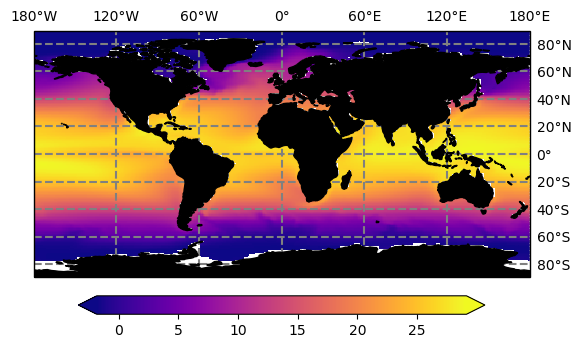

In [282]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
p = ax.pcolormesh(cyclic_lons, lat, cyclic_data, transform=ccrs.PlateCarree(),
                  cmap="plasma")
# sometimes you need to invoke zorder to layer things on top of each other
ax.add_feature(cfeature.LAND, color='k', zorder=4)
plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,
             extend="both")

# grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1.5, color='gray', linestyle='--')
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER